In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2a)

In [2]:
#Read in genes
p_df = pd.read_csv('/Users/timothyliu/Documents/121/HW3/p.tsv', sep='\t', header=None)
#Flatten into vector
p_flattened = p_df.values.flatten()

p_df

,0
0,0.004201
1,0.000391
2,0.001158
3,0.000052
4,0.000927
...,...
495,0.001054
496,0.000417
497,0.002523
498,0.000523


In [3]:
#Total # molecules for each sample
N = [15000, 30000, 150000]

#Generate samples Xj for each Nj w/ multinomial distribution
samples = [np.random.multinomial(n, p_flattened) for n in N] 
 #each element in samples is a numpy array
 #each array in samples gives counts of each gene for a sample

#dx3 matrix where each column is a sample
X_matrix = np.column_stack(samples)
X_matrix

array([[ 62, 108, 581],
       [  6,  13,  75],
       [ 19,  29, 170],
       ...,
       [ 49,  72, 416],
       [  9,  18,  75],
       [ 29,  69, 306]])

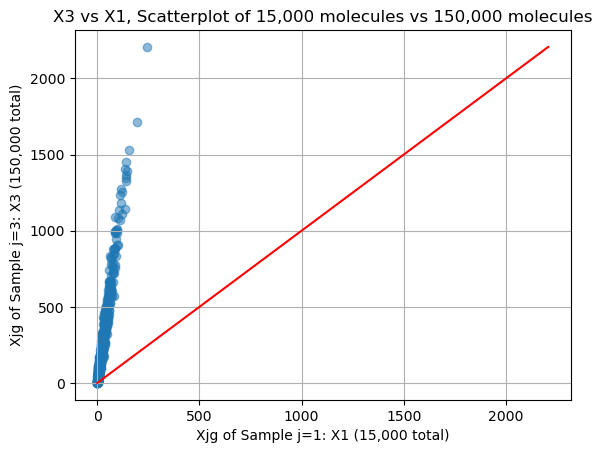

In [4]:
# Scatterplot of X3 vs X1 (Raw Counts))
plt.scatter(x= X_matrix[:, 0],y=X_matrix[:, 2], alpha=0.5)
plt.title('X3 vs X1, Scatterplot of 15,000 molecules vs 150,000 molecules')
plt.xlabel('Xjg of Sample j=1: X1 (15,000 total)')
plt.ylabel('Xjg of Sample j=3: X3 (150,000 total)')

plt.plot([0, max(X_matrix[:, 2])], [0, max(X_matrix[:, 2])], 'r')  # line x = y
plt.grid(True)
plt.show()

b)

In [5]:
#X_matrix
X_matrix[:, 0].sum()

15000

In [6]:
def DESEQ_normalization(dxN_matrix_input):
    #Size factor of each gene in each sample
    dxN_matrix = dxN_matrix_input[~np.any(dxN_matrix_input == 0, axis=1)]
    num_genes, num_samples = dxN_matrix.shape
    print(dxN_matrix.shape)
    
    '''
    Calculate geometric mean
    '''
    geometric_mean_matrix = np.zeros((num_genes, num_samples))
    for gene in range(num_genes): # For each row (gene) in the column
        log_sum = np.sum(np.log(dxN_matrix[gene, :])) #Sum of the log of the counts
        gene_geometric_mean = np.exp(log_sum / num_samples) #Calculate geometric mean
        
        for sample in range(num_samples):
            geometric_mean_matrix[gene, sample] = gene_geometric_mean #Append results to the gene's row

    '''
    Calculate s_jg
    '''
    sample_gene_specific_normalization_factors = np.zeros((num_genes, num_samples))
    for sample in range(num_samples): #For each column (Sample) in the matrix
        for gene in range(num_genes): # For each row (gene) in the column
            X_jg = dxN_matrix[gene, sample] #Get the count
            sample_gene_specific_normalization_factors[gene, sample] = X_jg / geometric_mean_matrix[gene, sample] #Divide by geometric mean
    
    '''
    Sample specific normalization factor
    '''
    sample_specific_normalization_factors =  np.median(sample_gene_specific_normalization_factors, axis=0)
    
    return sample_gene_specific_normalization_factors, sample_specific_normalization_factors

c)

In [7]:
size_jg, size_j = DESEQ_normalization(X_matrix)

(480, 3)


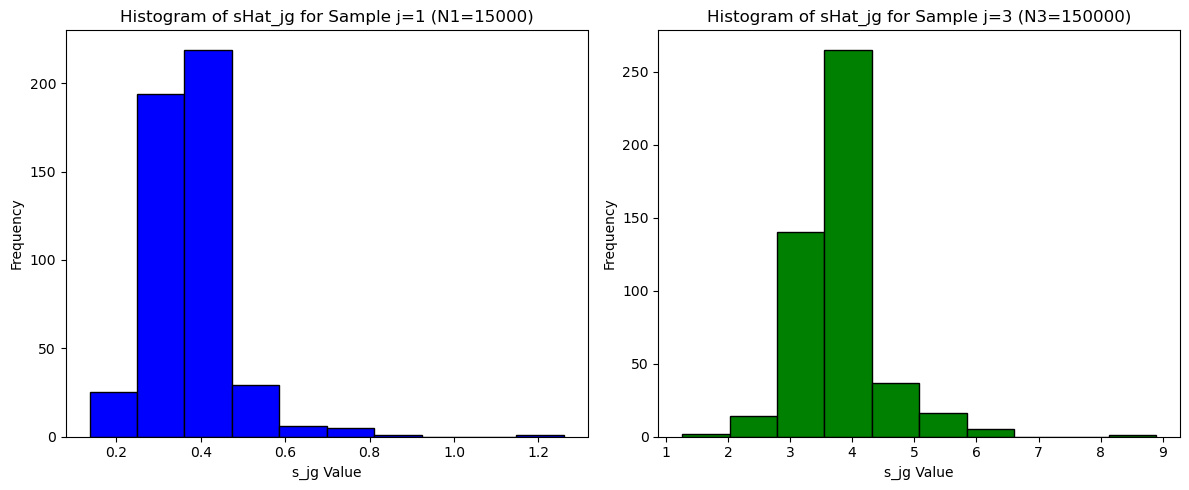

[0.36830397 0.74295306 3.69712198]


In [8]:
sample1_jhat = size_jg[:, 0]
sample3_jhat = size_jg[:, 2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample1_jhat, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=1 (N1=15000)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sample3_jhat, bins=10, color='green', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=3 (N3=150000)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(size_j)

d)

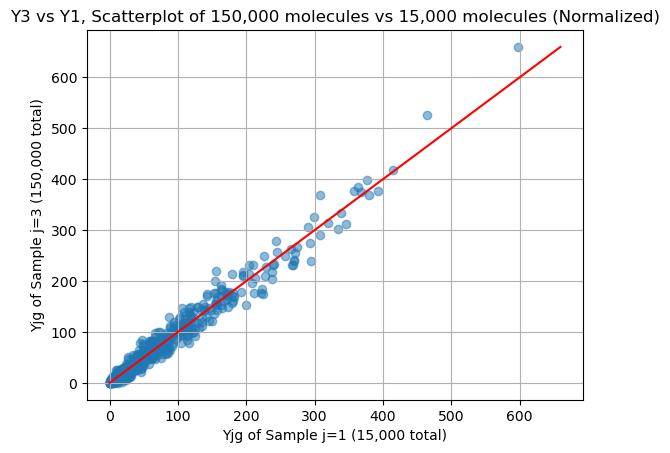

In [9]:
Y_1 = X_matrix[:, 0] / size_j[0]
Y_3 = X_matrix[:, 2] / size_j[2]

plt.scatter(Y_3, Y_1, alpha=0.5)
plt.title('Y3 vs Y1, Scatterplot of 150,000 molecules vs 15,000 molecules (Normalized)')
plt.xlabel('Yjg of Sample j=1 (15,000 total)')
plt.ylabel('Yjg of Sample j=3 (150,000 total)')

plt.plot([0, max(Y_1)], [0, max(Y_1)], 'r')  # line x = y
plt.grid(True)
plt.show()

e)

(499, 3)


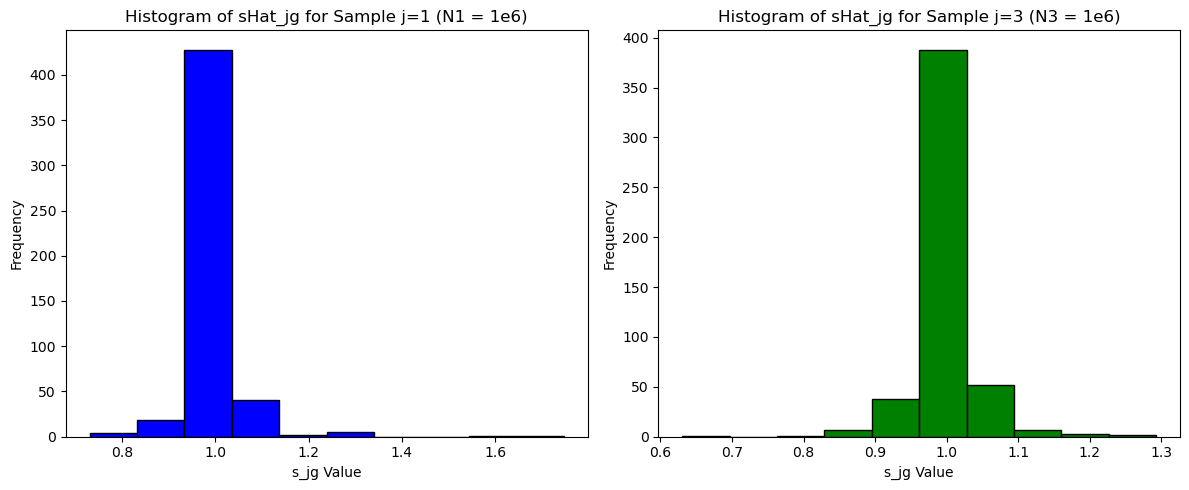

[0.99950818 1.00013142 1.00143445]


In [10]:
N2 = [1e6, 1e6, 1e6]

samples2 = [np.random.multinomial(n, p_flattened) for n in N2] 
 #each element in samples is a numpy array
 #each array in samples gives counts of each gene for a sample

#dx3 matrix where each column is a sample
X_matrix2 = np.column_stack(samples2)
X_matrix2

size_jg2, size_j2 = DESEQ_normalization(X_matrix2)

sample1_jhat2 = size_jg2[:, 0]
sample3_jhat2 = size_jg2[:, 2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample1_jhat2, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=1 (N1 = 1e6)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sample3_jhat2, bins=10, color='green', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=3 (N3 = 1e6)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(size_j2)

f)

(499, 3)


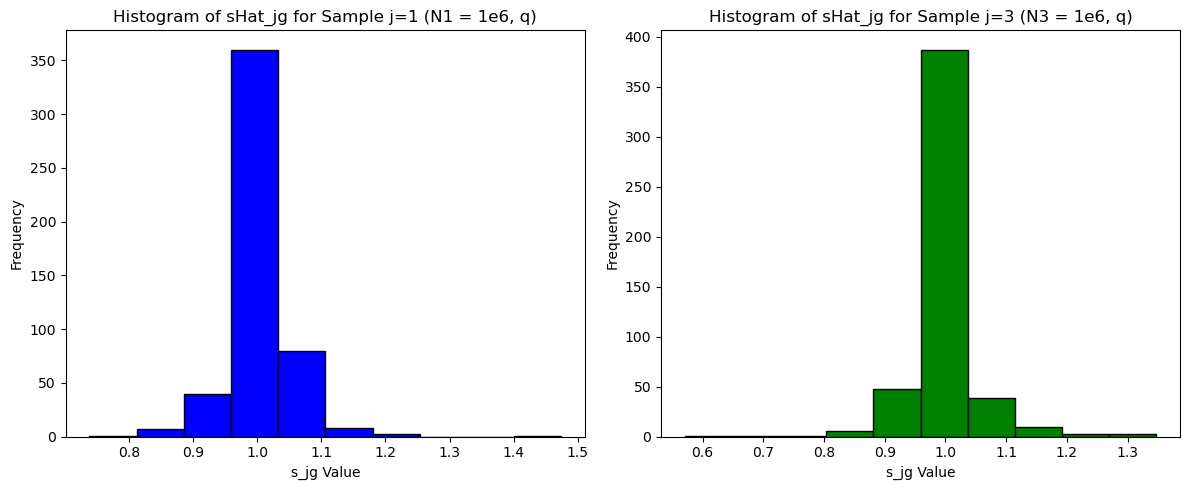

[1.00078628 0.99889043 1.00007831]


In [11]:
q_df = pd.read_csv('/Users/timothyliu/Documents/121/HW3/q.tsv', sep='\t', header=None)
q_flattened = q_df.values.flatten()

N3 = [1e6, 1e6, 1e6]

#Generate samples Xj for each Nj w/ multinomial distribution
samples3 = [np.random.multinomial(n, q_flattened) for n in N3] 
 #each element in samples is a numpy array
 #each array in samples gives counts of each gene for a sample

#dx3 matrix where each column is a sample
X_matrix3 = np.column_stack(samples3)

size_jg3, size_j3 = DESEQ_normalization(X_matrix3)

sample1_jhat3 = size_jg3[:, 0]
sample3_jhat3 = size_jg3[:, 2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample1_jhat3, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=1 (N1 = 1e6, q)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sample3_jhat3, bins=10, color='green', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=3 (N3 = 1e6, q)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(size_j3)

g)

(499, 6)


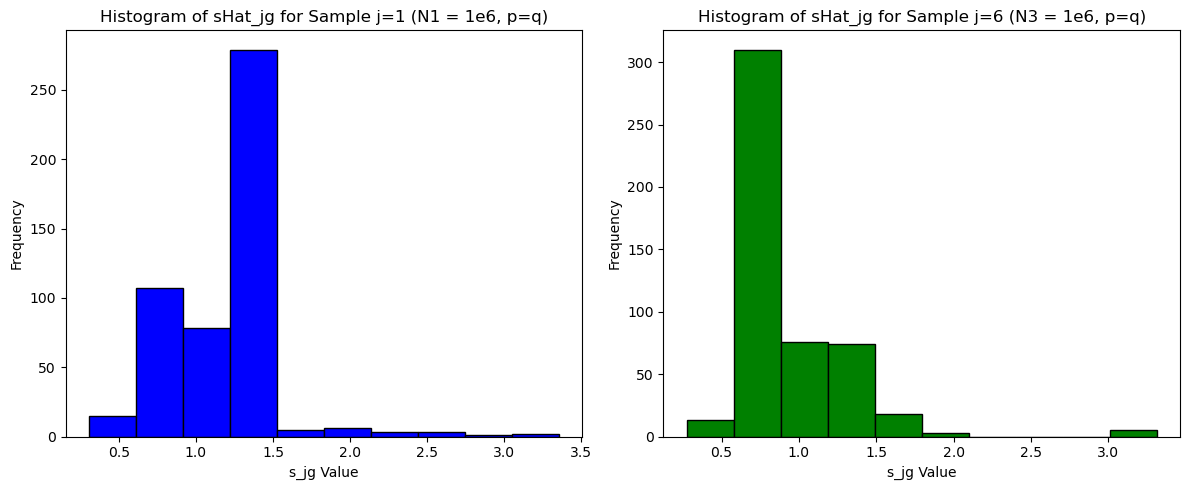

[1.25673284 1.25502997 1.25294917 0.80334528 0.79996612 0.79804501]


In [12]:
dx6_matrix = np.concatenate((X_matrix2, X_matrix3), axis=1)

size_jg4, size_j4 = DESEQ_normalization(dx6_matrix)

sample1_jhat4 = size_jg4[:, 0]
sample6_jhat4 = size_jg4[:, 5]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample1_jhat4, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=1 (N1 = 1e6, p=q)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sample6_jhat4, bins=10, color='green', edgecolor='black')
plt.title('Histogram of sHat_jg for Sample j=6 (N3 = 1e6, p=q)')
plt.xlabel('s_jg Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(size_j4)

In [13]:
X_matrix2

array([[4160, 4190, 4223],
       [ 386,  429,  416],
       [1203, 1131, 1152],
       ...,
       [2448, 2522, 2468],
       [ 506,  504,  502],
       [2000, 2039, 2013]])

In [14]:
dx6_matrix

array([[ 4160,  4190,  4223, 41167, 41538, 41356],
       [  386,   429,   416,  3874,  3771,  3798],
       [ 1203,  1131,  1152, 11440, 11428, 11466],
       ...,
       [ 2448,  2522,  2468,  1479,  1537,  1542],
       [  506,   504,   502,   327,   345,   345],
       [ 2000,  2039,  2013,  1277,  1255,  1248]])

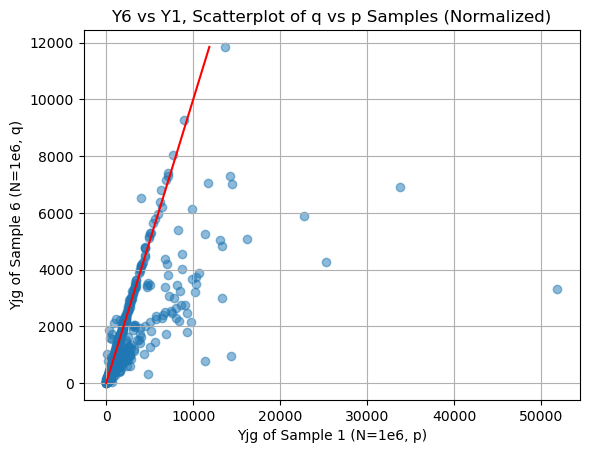

In [15]:
Y_1g = dx6_matrix[:, 0] / size_j4[0]
Y_6g = dx6_matrix[:, 5] / size_j4[5]

plt.scatter(Y_6g, Y_1g, alpha=0.5)
plt.title('Y6 vs Y1, Scatterplot of q vs p Samples (Normalized)')
plt.xlabel('Yjg of Sample 1 (N=1e6, p)')
plt.ylabel('Yjg of Sample 6 (N=1e6, q)')

plt.plot([0, max(Y_1g)], [0, max(Y_1g)], 'r')  # line x = y
plt.grid(True)
plt.show()